# Разработка Рейтинговой PD-модели для Контрагентов сегмента "Крупные и Крупнейшие заёмщики (КиК)" (BIGTOP)

<br>

# Содержание <a name = content></a>
  

- [<span style="color:red">**Версионность**</span>](#versions)
- [<span style="color:red">**Конфигурационные файлы**</span>](#config_files)

<br>

- [**Импорт библиотек + Словарь**](#initial_import)
    - [Master Scale](#initial_import__MS)
- [Определение функций](#functions)

<br>

- [**Загрузка финансовой отчетности**](#upload_financials)

- [**Данные сегмента**](#upload_segment)

<br>

# Версионность <a name = versions></a>

- 0.01 - Исходная версия
- ...
- 0.10 - Финальная версия

In [2]:
pip install numpy pandas matplotlib sqlalchemy

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ------------------- -------------------- 1.0/2.1 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 7.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
__version__w   = '010'
__CR_version__ = '015'
#
# --
from IPython.display import display, HTML

<br>

# Конфигурационные файлы <a name = config_files></a>

[Содержание](#content)

In [ ]:
#
#
#   ---------- I. ФАЙЛ ОСНОВНОЙ КОНФИГУРАЦИОННЫЙ (в т.ч. ПЕРЕМЕННЫЕ УПРАВЛЯЮЩИЕ)
#
#
___pathr_config_base___ = " "

<br>

# Импорт библиотек + Словарь <a name = initial_import></a>

[Содержание](#content)

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

<br>

## Master Scale <a name = initial_import__MS></a>

[Содержание](#content)

<br>

# Определение функций <a name = functions ></a>

[Содержание](#content)

<br>

# Загрузка финансовой отчетности <a name = uppload_financials ></a>

[Содержание](#content)

<br>

# <span style = "color:fuchsia">I.   DATA UPLOAD </span>

<br>

In [ ]:
engine = sqlalchemy.

<br>

## Данные сегмента <a name = upload_segment></a>

[Содержание](#content)

<br>

### Фильтрация <a name = filters ></a>

[Содержание](#content)

<br>

### Определение сегмента <a name = segmentation ></a>

[Содержание](#content)

<br>
  
### Выделение финансовой отчетности и Фиксирование сегмента <a name = financials__fix_segment></a>

[Содержание](#content)

<br>
  
### <span style = "color:violet">ПРОВЕРКА: пропщуенные значения</span> <a name = check01__missings></a>

[Содержание](content)

<br>

### Взвешивание <a name= data_weights>

[Содержание](#content)

In [14]:
class Cop(Agent):
    def __init__(
        self,
        unique_id,
        model,
        pos,
        regime_severity,
        cop_indoctrination,
        anger,
        obedience,
        violence_threshold,
        vision
    ):
        super().__init__(unique_id, model)
        self.breed = "cop"
        self.pos = pos
        self.vision = vision
        self.regime_severity = regime_severity
        self.cop_indoctrination = cop_indoctrination
        self.anger = anger
        self.obedience = obedience
        self.enraged = 1 - math.exp(-1*self.cop_indoctrination*self.anger)
        self.violence = self.regime_severity*self.enraged*(1 - self.obedience)
        self.violence_threshold = violence_threshold

    def step(self):
        self.update_neighbors()
        active_neighbors_citizen = []
        rampant_neighbors_citizen = []
        
        for agent in self.neighbors:
            if agent.breed == 'citizen' and agent.condition == 'Rampant' and agent.jail_sentence == 0:
                rampant_neighbors_citizen.append(agent)
            elif agent.breed == 'citizen' and agent.condition == 'Active' and agent.jail_sentence == 0:
                active_neighbors_citizen.append(agent)
                
        if len(rampant_neighbors_citizen) > 0 and \
                (self.violence_threshold <= self.violence):
            arrestee = random.choice(rampant_neighbors_citizen)  # полицейский случайным образом выбирает медиа агента
            sentence = random.randint(0, self.model.max_jail_term)  # случайному медиа агенту выбирается срок приговора
            arrestee.jail_sentence = sentence  # случайному медиа агенту выносится приговор

        elif len(rampant_neighbors_citizen) >= 0 and len(active_neighbors_citizen) > 0:
            arrestee = random.choice(active_neighbors_citizen)  # полицейский случайным образом выбирает гражданина
            sentence = random.randint(0, self.model.max_jail_term)  # случайному гражданину выбирается срок приговора
            arrestee.jail_sentence = sentence # случайному гражданину выносится приговор
            
            
        if self.model.movement and self.empty_neighbors:
            new_pos = self.random.choice(self.empty_neighbors)
            self.model.grid.move_agent(self, new_pos)

    def update_neighbors(self):
        self.neighborhood = self.model.grid.get_neighborhood(
            self.pos, moore=False, radius=1
        )
        self.neighbors = self.model.grid.get_cell_list_contents(self.neighborhood)
        self.empty_neighbors = [
            c for c in self.neighborhood if self.model.grid.is_cell_empty(c)
        ]

In [15]:
class EpsteinCivilViolence(Model):
    def __init__(
        self,
        height=40,
        width=40,
        citizen_density=0.7,
        cop_density=0.074,
        citizen_vision=7,
        cop_vision=7,
        legitimacy=0.8,
        max_jail_term=1000,
        active_inst_threshold=0.1,
        active_threat_threshold=0.3,
        active_violence_threshold=0.1,
        opposite=0.3,
        indoctrination=1.5,
        severity=0.3,
        arrest_prob_constant=2.3,
        movement=True,
        max_iters=1000
    ):
        super().__init__()
        self.height = height
        self.width = width
        self.citizen_density = citizen_density
        self.cop_density = cop_density
        self.citizen_vision = citizen_vision
        self.cop_vision = cop_vision
        self.legitimacy = legitimacy
        self.max_jail_term = max_jail_term
        self.active_inst_threshold = active_inst_threshold
        self.active_threat_threshold = active_threat_threshold
        self.active_violence_threshold = active_violence_threshold
        self.opposite = opposite
        self.indoctrination = indoctrination
        self.severity = severity
        self.arrest_prob_constant = arrest_prob_constant
        self.movement = movement
        self.max_iters = max_iters
        self.iteration = 0
        self.schedule = RandomActivation(self)
        self.grid = Grid(height, width, torus=True)
        model_reporters = {
            "Quiescent": lambda m: self.count_type_citizens(m, "Quiescent"),
            "Active": lambda m: self.count_type_citizens(m, "Active"),
            "Rampant": lambda m: self.count_type_citizens(m, "Rampant"),
            "Jailed": lambda m: self.count_jailed(m),
            "Assaulted": lambda m: self.count_assaulted(m)
        }
        agent_reporters = {
            "x": lambda a: a.pos[0],
            "y": lambda a: a.pos[1],
            "breed": lambda a: a.breed,
            "jail_sentence": lambda a: getattr(a, "jail_sentence", None),
            "condition": lambda a: getattr(a, "condition", None),
            "arrest_probability": lambda a: getattr(a, "arrest_probability", None),
        }
        self.datacollector = DataCollector(
            model_reporters=model_reporters, agent_reporters=agent_reporters
        )
        unique_id = 0
        if self.cop_density + self.citizen_density > 1:
            raise ValueError("Cop density + citizen density must be less than 1")
        
        for (contents, x, y) in self.grid.coord_iter():
            if self.random.random() < self.cop_density:
                cop = Cop(unique_id, 
                          self, 
                          (x, y), 
                          vision=self.cop_vision, 
                          regime_severity=self.severity,
                          anger=self.random.random(),
                          obedience=self.random.random(),
                          cop_indoctrination=self.indoctrination, 
                          violence_threshold=self.active_violence_threshold)
                unique_id += 1
                self.grid[y][x] = cop
                self.schedule.add(cop)
            
            elif self.random.random() < (self.cop_density + self.citizen_density):
                citizen = Citizen(
                    unique_id,
                    self,
                    (x, y),
                    hardship=self.random.random(),
                    regime_legitimacy=self.legitimacy,
                    risk_aversion=self.random.random(),
                    zero_tolerance=self.random.random(),
                    civil_opposite=self.opposite,
                    inst_threshold=self.active_inst_threshold,
                    threat_threshold=self.active_threat_threshold,
                    vision=self.citizen_vision
                )
                unique_id += 1
                self.grid[y][x] = citizen
                self.schedule.add(citizen)

        self.running = True
        self.datacollector.collect(self)

    def step(self):
        self.schedule.step()
        # collect data
        self.datacollector.collect(self)
        self.iteration += 1
        if self.iteration > self.max_iters:
            self.running = False

    @staticmethod
    def count_type_citizens(model, condition, exclude_jailed=True):
        count = 0
        for agent in model.schedule.agents:
            if agent.breed == "cop":
                continue
            if exclude_jailed and agent.jail_sentence:
                continue
            if agent.condition == condition:
                count += 1
        return count

    @staticmethod
    def count_jailed(model):
        """
        Helper method to count jailed agents.
        """
        count = 0
        for agent in model.schedule.agents:
            if agent.breed == "citizen" and agent.jail_sentence:
                count += 1
        return count
    
    @staticmethod
    def count_assaulted(model, condition):
        """
        Helper method to count assaulted agents.
        """
        count = 0
        for agent in model.schedule.agents:
            if agent.breed == "citizen" and agent.condition == 'Rampant' and agent.jail_sentence:
                count += 1
        return count

In [16]:
COP_COLOR = "#000000"
AGENT_QUIET_COLOR = "#0066CC"
AGENT_ACTIVE_COLOR = "#CC0000"
AGENT_RAMPANT_COLOR = "#00008B"
JAIL_COLOR = "#757575"
ASSAULT_COLOR = '#6AC4B2'

def citizen_cop_portrayal(agent):
    if agent is None:
        return

    portrayal = {
        "Shape": "circle",
        "x": agent.pos[0],
        "y": agent.pos[1],
        "Filled": "true",
    }

    if isinstance(agent, Citizen):
        color = AGENT_QUIET_COLOR if agent.condition == "Quiescent" else color
        color = AGENT_ACTIVE_COLOR if agent.condition == "Active" else color
        color = AGENT_RAMPANT_COLOR if agent.condition == "Rampant" else color
        color = JAIL_COLOR if agent.jail_sentence else color
        color = ASSAULT_COLOR if agent.jail_sentence and agent.condition == "Rampant" else color
        
        portrayal["Color"] = color
        portrayal["r"] = 0.8
        portrayal["Layer"] = 0

    elif isinstance(agent, Cop):
        portrayal["Color"] = COP_COLOR
        portrayal["r"] = 0.5
        portrayal["Layer"] = 1
    return portrayal

In [17]:
COP_COLOR = "#000000"
AGENT_QUIET_COLOR = "#0066CC"
AGENT_ACTIVE_COLOR = "#CC0000"
AGENT_RAMPANT_COLOR = "#00008B"
JAIL_COLOR = "#757575"
ASSAULT_COLOR = '#6AC4B2'


def citizen_cop_portrayal(agent):
    if agent is None:
        return

    portrayal = {
        "Shape": "circle",
        "x": agent.pos[0],
        "y": agent.pos[1],
        "Filled": "true",
    }

    if type(agent) is Citizen:
        color = AGENT_QUIET_COLOR if agent.condition == "Quiescent" else color
        color = AGENT_ACTIVE_COLOR if agent.condition == "Active" else color
        color = AGENT_RAMPANT_COLOR if agent.condition == "Rampant" else color
        color = JAIL_COLOR if agent.jail_sentence else color
        color = ASSAULT_COLOR if agent.jail_sentence and agent.condition == "Rampant" else color
        
        portrayal["Color"] = color
        portrayal["r"] = 0.8
        portrayal["Layer"] = 0

    elif type(agent) is Cop:
        portrayal["Color"] = COP_COLOR
        portrayal["r"] = 0.5
        portrayal["Layer"] = 1
    return portrayal




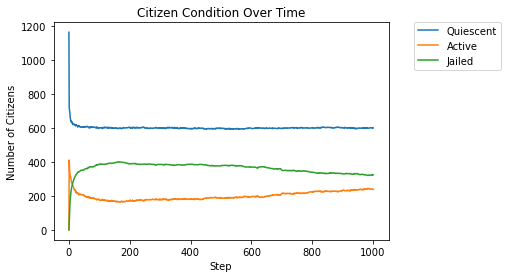

In [ ]:
ax = model_out.plot()
ax.set_title('Citizen Condition Over Time')
ax.set_xlabel('Step')
ax.set_ylabel('Number of Citizens')
_ = ax.legend(bbox_to_anchor=(1.35, 1.025))

In [21]:
model_results = []
parameters = []
count = 0

for citizen_density in [0.2, 0.4]:
    for cop_density in [0.05, 0.1]:
            for legitimacy in [0.1, 0.4, 0.8]:
                    for max_jail_term in [5, 10, 30]:
                        for active_threshold in [0.1, 0.2, 0.5]:
                                model = EpsteinCivilViolence(height=40, 
                                                           width=40,
                                                           citizen_density=citizen_density, 
                                                           cop_density=cop_density,
                                                           citizen_vision=2, 
                                                           cop_vision=3,
                                                           legitimacy=legitimacy,
                                                           max_jail_term=max_jail_term,
                                                           active_threshold=active_threshold,
                                                           max_iters = 100)
                                model.run_model()
                                    
                                model_results.append([model.datacollector.get_model_vars_dataframe()["Quiescent"].max(),
                                                      model.datacollector.get_model_vars_dataframe()["Quiescent"].min(),
                                                      model.datacollector.get_model_vars_dataframe()["Quiescent"].median(),
                                                      model.datacollector.get_model_vars_dataframe()["Quiescent"].autocorr(1),
                                                      model.datacollector.get_model_vars_dataframe()["Quiescent"].values[-1],
                                                          
                                                      model.datacollector.get_model_vars_dataframe()["Active"].max(),
                                                      model.datacollector.get_model_vars_dataframe()["Active"].min(),
                                                      model.datacollector.get_model_vars_dataframe()["Active"].median(),
                                                      model.datacollector.get_model_vars_dataframe()["Active"].autocorr(1),
                                                      model.datacollector.get_model_vars_dataframe()["Active"].values[-1],
                                                          
                                                      model.datacollector.get_model_vars_dataframe()["Jailed"].max(),
                                                      model.datacollector.get_model_vars_dataframe()["Jailed"].min(),
                                                      model.datacollector.get_model_vars_dataframe()["Jailed"].median(),
                                                      model.datacollector.get_model_vars_dataframe()["Jailed"].autocorr(1),
                                                      model.datacollector.get_model_vars_dataframe()["Jailed"].values[-1]])
                                    
                                parameters.append([citizen_density, cop_density,
                                                   legitimacy,
                                                   max_jail_term, active_threshold])
                                count += 1
                                
                                if count%100 == 0:
                                    print("Получена информация для %d моделей." % (count))

Получена информация для 100 моделей.
